

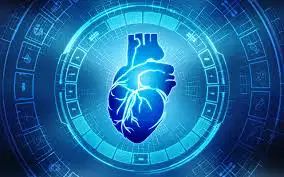



Importing All The Python libraries Which Are Going To Be Used In This Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data=pd.read_csv("/content/drive/MyDrive/DATA SET/heart.csv")

In [3]:
# print first 5 rows of the dataset
heart_data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [9]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Data visualization**

1--> Sex vs Target

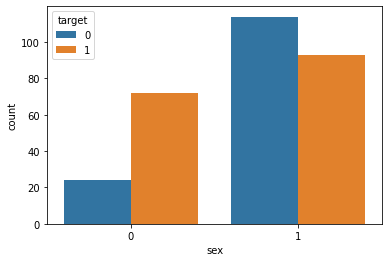

In [11]:
sns.countplot(x='sex',hue='target',data=heart_data)

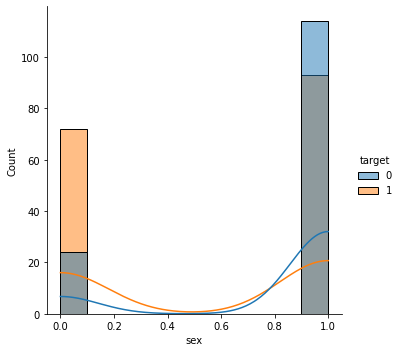

In [12]:
sns.displot(data=heart_data,x="sex",hue="target",kde=True)

2---> Age vs Target

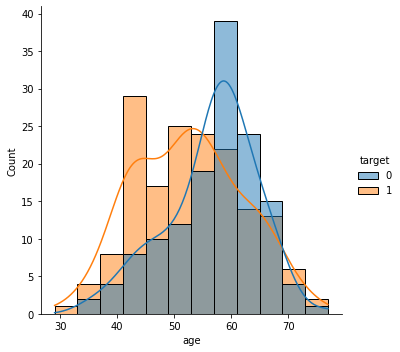

In [13]:
sns.displot(data=heart_data,x="age",hue="target",kde=True)

3---> Chest pain type vc Target

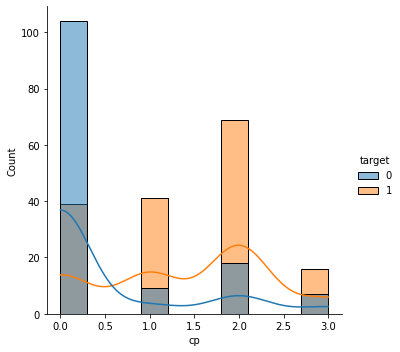

In [14]:
sns.displot(data=heart_data,x="cp",hue="target",kde=True)

4---> Resting blood pressure vs target

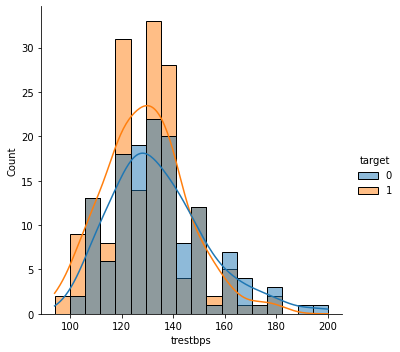

In [15]:
sns.displot(data=heart_data,x="trestbps",hue="target",kde=True)

5---> Serum cholestoral vs target

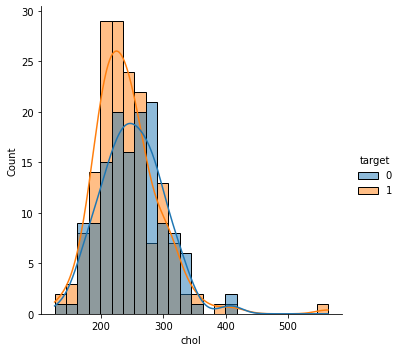

In [16]:
sns.displot(data=heart_data,x="chol",hue="target",kde=True)

6--->  Thalach: maximum heart rate achieved vs target

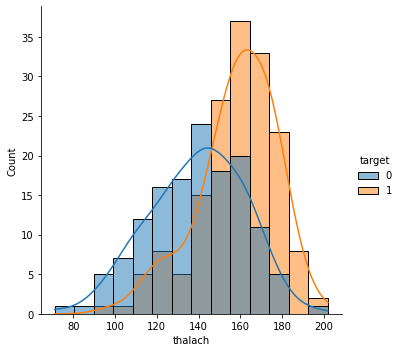

In [17]:
sns.displot(data=heart_data,x="thalach",hue="target",kde=True)

7---> Oldpeak vc target

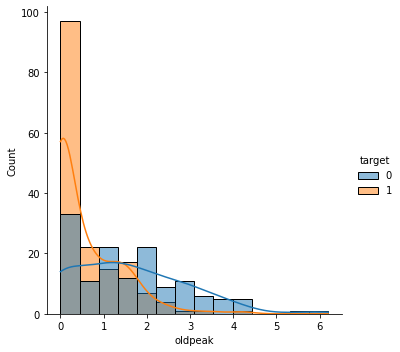

In [18]:
sns.displot(data=heart_data,x="oldpeak",hue="target",kde=True)

8---> Slope vc target

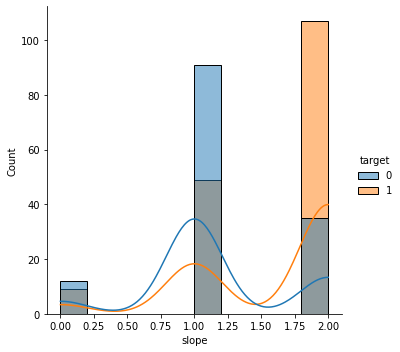

In [19]:
sns.displot(data=heart_data,x="slope",hue="target",kde=True)

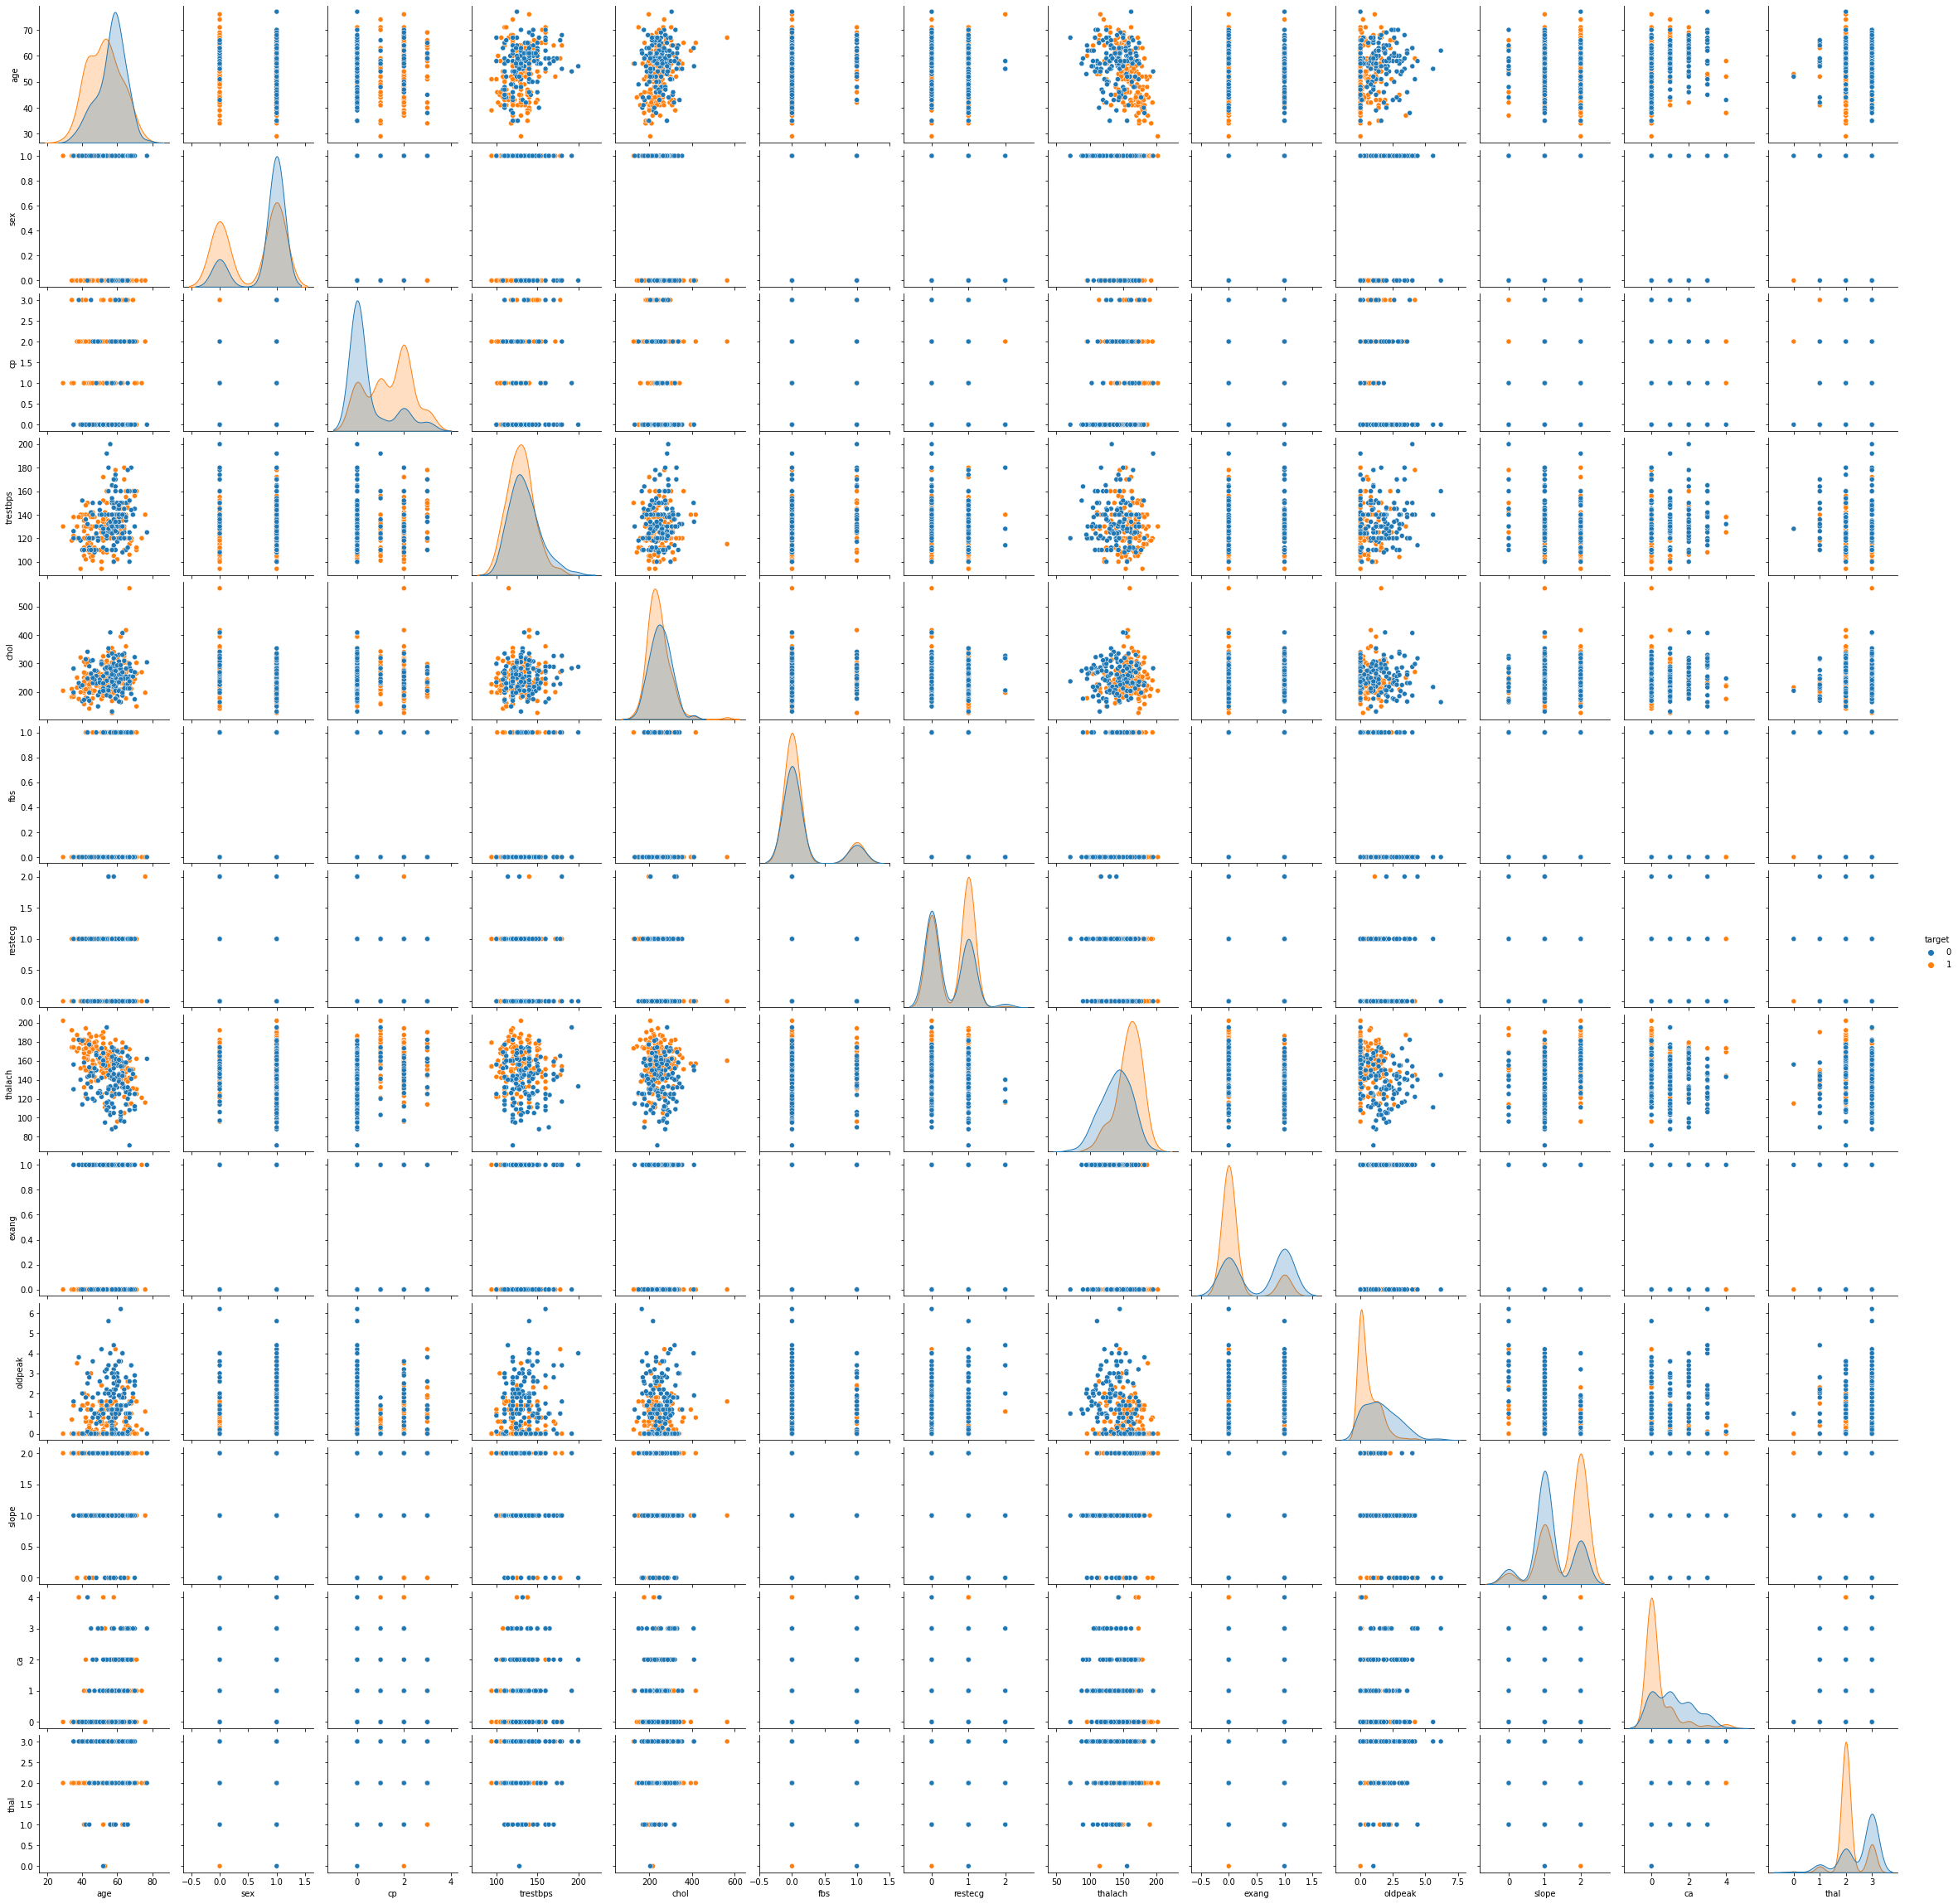

In [20]:
sns.pairplot(heart_data, hue='target')

Text(0.5, 1.0, 'Correlation Map')

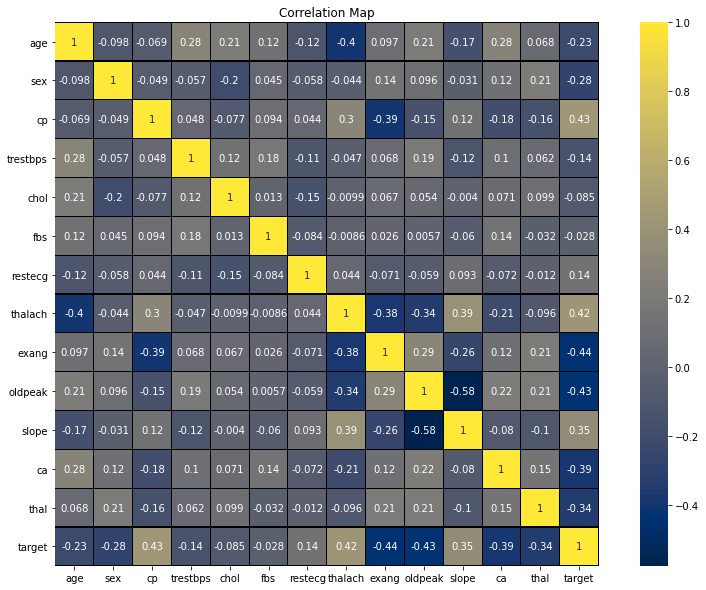

In [21]:
plt.subplots(figsize=(15,10))
sns.heatmap(heart_data.corr(),linewidth=0.1,vmax=1.0,square=True,cmap='cividis',annot=True,linecolor='black').set_title("Correlation Map")

**Dealing With Outliers**

In [22]:
#Printing IQR from the dateset to find Outliers
Q1 =heart_data.quantile(0.25)
Q3=heart_data.quantile(0.75)
IQR =Q3-Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [23]:
#Finding Lower limit and Upper Limit of Outliers
lower_limit= Q1 - 1.5 * IQR
Upper_limit= Q3 + 1.5 * IQR
lower_limit,Upper_limit

(age          27.25
 sex          -1.50
 cp           -3.00
 trestbps     90.00
 chol        115.75
 fbs           0.00
 restecg      -1.50
 thalach      84.75
 exang        -1.50
 oldpeak      -2.40
 slope        -0.50
 ca           -1.50
 thal          0.50
 target       -1.50
 dtype: float64, age          81.25
 sex           2.50
 cp            5.00
 trestbps    170.00
 chol        369.75
 fbs           0.00
 restecg       2.50
 thalach     214.75
 exang         2.50
 oldpeak       4.00
 slope         3.50
 ca            2.50
 thal          4.50
 target        2.50
 dtype: float64)

In [24]:
#Removing Outliers from the dataset
heart_outlier_data = heart_data[~((heart_data < (Q1 - 1.5 * IQR)) |(heart_data > (Q3 + 1.5 * IQR))).any(axis=1)]
heart_outlier_data.shape

(228, 14)

In [25]:
#Printing Shape before and after outliers
print(f'Before: {heart_data.shape}, After: {heart_outlier_data.shape}')

Before: (303, 14), After: (228, 14)


In [26]:
heart_outlier_data["target"].value_counts()

1    132
0     96
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [27]:
heart_outlier_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,55.656250,0.875000,0.500000,130.333333,245.864583,0.0,0.468750,140.072917,0.541667,1.478125,1.229167,0.843750,2.614583
1,51.643939,0.530303,1.265152,127.462121,239.833333,0.0,0.606061,159.068182,0.151515,0.559091,1.613636,0.212121,2.098485


In [28]:
X = heart_outlier_data.drop(columns='target', axis=1)
Y = heart_outlier_data['target']

In [29]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
5     57    1   0       140   192  ...      0      0.4      1   0     1
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
296   63    0   0       124   197  ...      1      0.0      1   0     2
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[228 rows x 13 columns]


In [30]:
print(Y)

1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: target, Length: 228, dtype: int64


**Splitting the Data into Training data & Test Data**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(228, 13) (182, 13) (46, 13)


**Model Training**

Logistic Regression

In [33]:
model_log = LogisticRegression()

In [34]:
# training the LogisticRegression model with Training data
model_log.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Model Evaluation**

Accuracy Score

In [35]:
# accuracy on training data
X_train_prediction =model_log.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9065934065934066


In [37]:
# accuracy on test data
X_test_prediction = model_log.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [38]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7608695652173914


Decision Tree Classifier

In [39]:
model_dt=tree.DecisionTreeClassifier()

In [40]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy Score

In [41]:
# accuracy score on the training data
X_train_prediction = model_dt.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [42]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [43]:
X_test_prediction = model_dt.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [44]:
print('Accuracy score of the training data : ', test_data_accuracy)

Accuracy score of the training data :  0.6739130434782609


**SVM**

In [45]:
model_svm = SVC(kernel='linear')

In [46]:
#training the support vector Machine Classifier
model_svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model Evaluation

Accuracy Score

In [47]:
# accuracy score on the training data
X_train_prediction = model_svm.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction, Y_train)

In [48]:
print('Accuracy score of the training data : ', training_data_accuracy_svm)

Accuracy score of the training data :  0.9065934065934066


In [49]:
# accuracy on test data
X_test_prediction = model_svm.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_test_prediction, Y_test)

In [50]:
print('Accuracy score of the test data : ', test_data_accuracy_svm)

Accuracy score of the test data :  0.782608695652174


**Building a Predictive System**

In [56]:
input_data = (45,1,0,115,260,0,0,185,0,0,2,0,2)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_log.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [52]:
import pickle

In [53]:
with open("heart_model",'wb') as file:
    pickle.dump(model_log,file)